### ```AUTOR:``` MARTIN PEREZ MAGALLANES
### ```FECHA:``` 05/06/2021
### ```MATERIA:``` MATEMATICA 3

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import re

In [2]:
datos=['A','B','C','D','E','T']
grafo=[ ['A','B',12],
        ['A','D',14],
        ['B','D',4 ],
        ['B','E',11],
        ['B','C',7 ],
        ['B','T',23],
        ['C','T',10],
        ['C','E',2 ],
        ['D','E',6 ],
        ['E','T',9 ]]

In [3]:
class MIGRAFO:
    def __init__(self,Grf,datos):
        self.grafo=Grf
        self.grafo.add_weighted_edges_from(datos)
        self.position=nx.shell_layout(Grf)
    def diagramaGrafo(self,graf):
        """
            Esta funcion nos permitira graficar el Grafo y emitirlo.
        """
        nx.adjacency_matrix(graf)
        nx.incidence_matrix(graf)
        fig, ax = plt.subplots(figsize=(20,10))
        nx.draw_networkx_nodes(graf,self.position,node_color="pink",node_size=2000)
        nx.draw_networkx_labels(graf,self.position,font_size=20,font_family='sans-serif')

        nx.draw_networkx_edges(graf,self.position,width=2, arrowsize = 40,edge_color='white')
        labels=nx.get_edge_attributes(graf,'weight')
        nx.draw_networkx_edge_labels(graf,self.position,edge_labels=labels)

        plt.axis('off')
        fig.set_facecolor('black')
        plt.show()
    def emitoGraph(self):
        """
            Emitira el grafo original
        """
        self.diagramaGrafo(self.grafo)
    def emitoGraphDirigido(self):
        """
            Emitira el grafo pero Dirigido
        """
        dirigido=self.grafo.to_directed()
        self.diagramaGrafo(dirigido)


    

In [4]:
G=nx.Graph()
migrafo=MIGRAFO(G,grafo)

## ```c)Emitir números de nodos```
## ```d)Emitir los nodos```

In [5]:
print('Numero de nodos:',migrafo.grafo.number_of_nodes())
print(migrafo.grafo.nodes())

Numero de nodos: 6
['A', 'B', 'D', 'E', 'C', 'T']


## ```e)Emitir números de enlaces```
## ```f)Emitir los enlaces```

In [6]:
print('Numero de enlaces:',migrafo.grafo.number_of_edges())
print(migrafo.grafo.edges())

Numero de enlaces: 10
[('A', 'B'), ('A', 'D'), ('B', 'D'), ('B', 'E'), ('B', 'C'), ('B', 'T'), ('D', 'E'), ('E', 'C'), ('E', 'T'), ('C', 'T')]


## ```g)Emitir los vecinos de ‘b’```

In [7]:
print('Vecinos:',list(migrafo.grafo.neighbors('B')))

Vecinos: ['A', 'D', 'E', 'C', 'T']


## ```h)Emitir cantidad de aristas de cada nodo```
## ```i)Convertir en diccionario la salida anterior```

In [8]:
print('Cantidad de aristas de cada nodo:',migrafo.grafo.degree())
print('En modo Diccionario:',dict(migrafo.grafo.degree()),sep='\n')

Cantidad de aristas de cada nodo: [('A', 2), ('B', 5), ('D', 3), ('E', 4), ('C', 3), ('T', 3)]
En modo Diccionario:
{'A': 2, 'B': 5, 'D': 3, 'E': 4, 'C': 3, 'T': 3}


## ```j)Crear la matriz de adyacencia y emitirla```

In [9]:
matrizAdyacencia = nx.adjacency_matrix(migrafo.grafo)
print('Matriz de adyacencia:',matrizAdyacencia.todense(),sep='\n\n') 

Matriz de adyacencia:

[[ 0 12 14  0  0  0]
 [12  0  4 11  7 23]
 [14  4  0  6  0  0]
 [ 0 11  6  0  2  9]
 [ 0  7  0  2  0 10]
 [ 0 23  0  9 10  0]]


## ```k)Crear la matriz de incidencia y emitirla```

In [ ]:
matrizIncidencia =  nx.incidence_matrix(migrafo.grafo)
print('Matriz de incidencia:',matrizIncidencia.todense(),sep='\n\n')

## ```l)Emitir valores de los enlaces del nodo ‘c’```

In [11]:
print("Valores de los enlaces del nodo: ",migrafo.grafo['C'],sep='\n')

Valores de los enlaces del nodo: 
{'B': {'weight': 7}, 'T': {'weight': 10}, 'E': {'weight': 2}}


## ```m)Emitir el peso de la relación entre ‘b’ y ‘e```

In [12]:
print("Peso de la relación:", migrafo.grafo['B']['E']['weight'])

Peso de la relación: 11


## ```n)Emitir la ruta más corta desde ‘a’ al objetivo```
## ```o)Emitir la longitud desde ‘a’ hasta el objetivo```

In [13]:
print("Ruta mas corta al objetivo: ", nx.algorithms.shortest_path(migrafo.grafo, 'A'),sep='\n') 
print("Longitud de Ruta mas corta desde: ",nx.single_source_shortest_path_length(migrafo.grafo, 'A'),sep='\n')

Ruta mas corta al objetivo: 
{'A': ['A'], 'B': ['A', 'B'], 'D': ['A', 'D'], 'E': ['A', 'B', 'E'], 'C': ['A', 'B', 'C'], 'T': ['A', 'B', 'T']}
Longitud de Ruta mas corta desde: 
{'A': 0, 'B': 1, 'D': 1, 'C': 2, 'T': 2, 'E': 2}


## ```p)Emitir el promedio de la ruta más corta usando el método de floyd-warshall```

In [14]:
print("Promedio de la ruta mas corta usando metodo floyd-warshall:", nx.algorithms.average_shortest_path_length(migrafo.grafo, method="floyd-warshall"))

Promedio de la ruta mas corta usando metodo floyd-warshall: 1.3333333333333333


## ```q)Emitir la ruta ponderada más corta entre ‘a’ y ‘t’ usando el algoritmo de Dijkstra```
## ```r)Emitir la longitud de la ruta ponderada entre ‘a’ y ‘t’```

In [15]:
print("Ruta mas corta usando el algoritmo de Dijkstra entre:",nx.algorithms.dijkstra_path(migrafo.grafo, 'A', 'T'))
print("Longitud de Ruta ponderada más corta entre:",nx.dijkstra_path_length(migrafo.grafo,'A','T'))

Ruta mas corta usando el algoritmo de Dijkstra entre: ['A', 'B', 'C', 'T']
Longitud de Ruta ponderada más corta entre: 29


## ```s)Emitir la longitud de la ruta desde el nodo ‘c‘```

In [16]:
print("Longitud de Ruta ponderada más corta desde el nodo:", nx.single_source_dijkstra_path_length(migrafo.grafo,'C'),sep='\n')

Longitud de Ruta ponderada más corta desde el nodo:
{'C': 0, 'E': 2, 'B': 7, 'D': 8, 'T': 10, 'A': 19}


## ```t)Emitir el radio del grafo```
## ```u)Emitir el diámetro del grafo```
## ```v)Emitir la excentricidad ```
## ```w)Emitir el centro del grafo```
## ```x)Emitir la periferia del grafoy)Emitir la densidad.```

In [17]:
print("Radio:",nx.radius(migrafo.grafo))
print("Diámetro:", nx.diameter(migrafo.grafo))
print("Excentricidad:", nx.eccentricity(migrafo.grafo))
print("Centro:", nx.center(migrafo.grafo))
print("Periferia:", nx.periphery(migrafo.grafo))
print("Densidad:", nx.density(migrafo.grafo))

Radio: 1
Diámetro: 2
Excentricidad: {'A': 2, 'B': 1, 'D': 2, 'E': 2, 'C': 2, 'T': 2}
Centro: ['B']
Periferia: ['A', 'D', 'E', 'C', 'T']
Densidad: 0.6666666666666666


## ```z)Dibujar el grafo y emitir con matplotlib.pyplot```

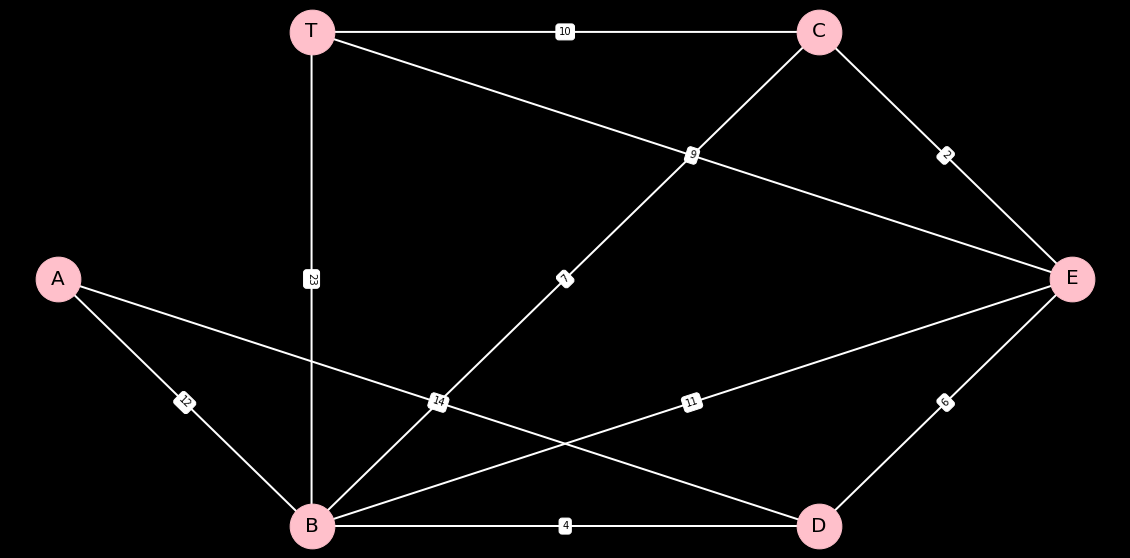

In [18]:
migrafo.emitoGraph()


## ```aa)Convertir en grafo dirigido. Dibujarel nuevo grafoy emitir con matplotlib.pyplot```

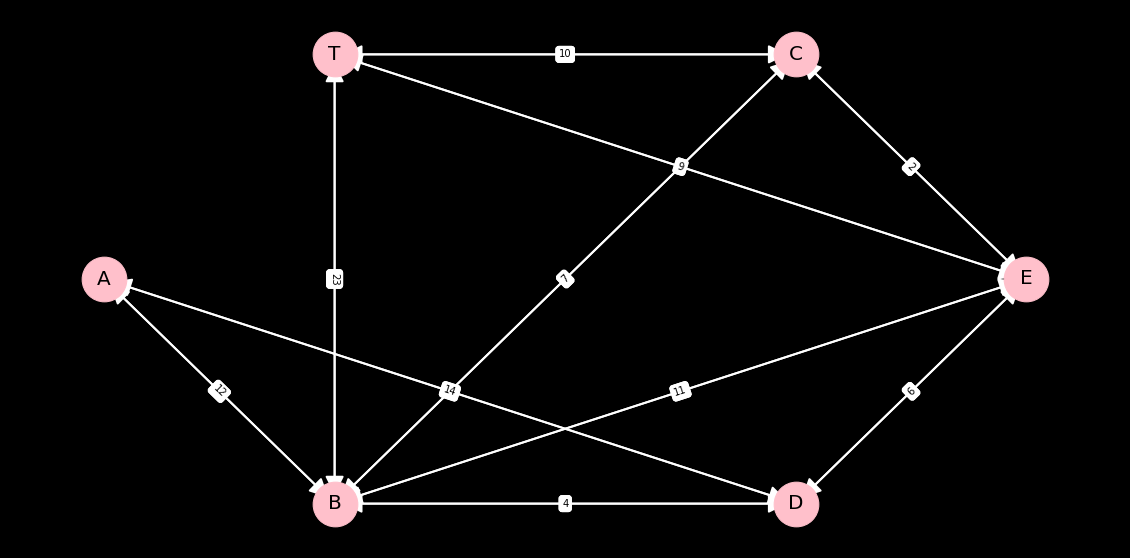

In [19]:
migrafo.emitoGraphDirigido()

## ```3. Las siguientes líneas de texto fueron extraídas de un archivo conmuchas entradas, representan: ip, usuario, fecha y hora y petición. Encuentra la expresión regular para extraer y emitir la cadena entre " ". Desarrollael código correspondiente.(Valor 2puntos)```

In [20]:
texto = """
98.140.180.244 - harber4797 [21/Jun/2019:16:01:53 -0700] "POST /seize/b2b/synergistic HTTP/2.0" 203 9396
229.231.201.185 - - [21/Jun/2019:16:01:35 -0700] "HEAD /supply-chains/brand/strategic HTTP/1.1" 405 28109
197.150.196.204 - thiel4558 [21/Jun/2019:16:01:05 -0700] "PATCH /compelling HTTP/2.0" 500 14180
"""
regex= r'"(.+)"'
listaDeValores = re.findall(regex, texto) 
print(listaDeValores)

['POST /seize/b2b/synergistic HTTP/2.0', 'HEAD /supply-chains/brand/strategic HTTP/1.1', 'PATCH /compelling HTTP/2.0']
